In [6]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import numpy as np
import pandas as pd

데이터 분석을 위해 가장 먼저 할 일은 데이터를 불러오는 일이다. => 불러온 데이터를 데이터 집합(set)이라고 한다.

In [7]:
# read_csv() 메소드로 갭마인더 데이터 집합을 불러와서 데이터프레임으로 리턴한다.
# read_csv() 메소드는 ','로 구분된 데이터를 불러오기 때문에 탭으로 구분된 갭마인더 데이터는 sep='\t' 옵션을 사용해 불러온다.
gapminder_df = pd.read_csv('./data/gapminder.tsv', sep='\t')
print(type(gapminder_df)) # <class 'pandas.core.frame.DataFrame'>
gapminder_df

<class 'pandas.core.frame.DataFrame'>


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [8]:
# pandas에 head() 메소드는 데이터프레임의 앞쪽 데이터를 지정된 인수개 만큼 출력한다. 인수가 지정되지 않으면 5개가 기본값으로
# 사용된다.
gapminder_df.head(3)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710


In [9]:
# pandas에 tail() 메소드는 데이터프레임의 뒤쪽 데이터를 지정된 인수개 만큼 출력한다. 인수가 지정되지 않으면 5개가 기본값으로
# 사용된다.
gapminder_df.tail(3)

,country,continent,year,lifeExp,pop,gdpPercap
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [10]:
# pandas의 shape 속성은 데이터프레임이 가지고 있는 데이터의 행과 열에 대한 크기 정보를 저장하고 있다.
print(gapminder_df.shape)
print(gapminder_df.shape[0]) # shape[0]은 데이터프레임의 행의 개수를 저장하고 있다.
print(gapminder_df.shape[1]) # shape[1]은 데이터프레임의 열의 개수를 저장하고 있다.
# pandas의 colunms 속성은 데이터프레임의 열 이름을 저장하고 있다.
print(gapminder_df.columns)
# country : 국가, continent : 대륙, year : 년도, lifeExp : 평균수명, pop : 인구수, gdpPercap : 1인당 GDP

(1704, 6)
1704
6
Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [11]:
# pandas의 dtypes 속성은 데이터프레임을 구성하고 있는 데이터의 자료형을 확인할 수 있다. object => 문자열
print(gapminder_df.dtypes)
# pandas의 info() 메소드를 사용하면 dtypes를 사용한 것 보다 좀 더 자세한 내용을 확인할 수 있다.
print(gapminder_df.info())

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


열 단위 데이터 추출하기

In [12]:
# 데이터프레임에서 데이터를 열 단위로 추출하려면 대활화 열 이름을 사용하며 추출한 열은 변수에 저장해서 사용한다.
# 1개의 열만 추출하면 시리즈를 얻을 수 있다.
country_df = gapminder_df['country'] # 데이터프레임에서 1개의 열만 얻어오려면 열 이름만 사용하면 된다.
print(type(country_df)) # <class 'pandas.core.series.Series'>
print(country_df.head())
print(country_df.tail())

<class 'pandas.core.series.Series'>
0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [13]:
# 2개 이상의 열을 추출하면 데이터프레임을 얻을 수 있다.
# 데이터프레임에서 1개의 열만 얻어오려면 [] 안에 열 이름만 적어주면 되지만 2개 이상의 열을 얻어오려면 [] 안에 반드시 리스트
# 형태로 열 이름을 적어줘야 한다.
subset_df = gapminder_df[['country', 'continent', 'year']]
print(type(subset_df)) # <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [14]:
subset_df.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [15]:
subset_df.tail()

,country,continent,year
1699,Zimbabwe,Africa,1987
1700,Zimbabwe,Africa,1992
1701,Zimbabwe,Africa,1997
1702,Zimbabwe,Africa,2002
1703,Zimbabwe,Africa,2007


행 단위 데이터 추출하기  
loc는 인덱스를 기준으로 행 단위로 데이터를 추출하고 iloc는 행 번호를 기준으로 행 단위로 데이터를 추출한다.

In [16]:
# head() 메소드를 실행했을 때 맨 왼쪽에 보이는 숫자가 인덱스를 의미하고 행 번호는 데이터의 순서를 의미한다.
print(gapminder_df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [17]:
# loc를 사용하면 0 ~ 1703 사이의 값을 이용해 행 단위 데이터를 추출할 수 있고 -1 이나 1704와 같이 인덱스 범위를 벗어나는
# 인덱스를 지정하면 에러가 발생된다.
print(gapminder_df.loc[0])
print('=' * 80)
print(gapminder_df.loc[1703])
print('=' * 80)
# 마지막 데이터 추출하기 => shape[0]에 전체 행의 크기가 저장되어 있는 것을 이용한다.
# print(gapminder_df.loc[-1]) # 에러
print(gapminder_df.shape)
print(gapminder_df.shape[0])
print(gapminder_df.loc[gapminder_df.shape[0] - 1])
print('=' * 80)
# 마지막 데이터 추출하기 => tail() 메소드를 이용한다.
print(gapminder_df.tail(1))
print('=' * 80)
# 여러 인덱스의 데이터를 한꺼번에 추출하려면 리스트에 추출하려는 데이터의 인덱스를 담아서 loc에 넘겨주면 된다.
print(gapminder_df.loc[[0, 99, 999, 1703]])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
(1704, 6)
1704
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298
          country continent  year  lifeExp       pop    gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333   779.445314
99     Bangladesh      Asia  1967   43.453  62821884   721.186086
999      Mongolia      Asia  1967   51.253   1149500  1226.041130
1703     Zimbabwe    Africa  2007   43.487  12311143   469.709298


In [18]:
# iloc를 사용하면 0 ~ 1703 사이의 값을 이용해 행 단위 데이터를 추출할 수 있고 1704와 같이 범위를 벗어나는 행 번호를 사용하면
# 에러가 발생된다.
# 음수를 지정하면 뒤 부터 역순으로 행 단위의 데이터를 추출할 수 있다.
print(gapminder_df.iloc[1703])
print('=' * 80)
print(gapminder_df.iloc[-1])
print('=' * 80)
# 여러 인덱스의 데이터를 한꺼번에 추출하려면 리스트에 추출하려는 데이터의 인덱스를 담아서 iloc에 넘겨주면 된다.
print(gapminder_df.iloc[[0, 99, 999, 1703]])

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
          country continent  year  lifeExp       pop    gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333   779.445314
99     Bangladesh      Asia  1967   43.453  62821884   721.186086
999      Mongolia      Asia  1967   51.253   1149500  1226.041130
1703     Zimbabwe    Africa  2007   43.487  12311143   469.709298


loc와 iloc를 자유자재로 사용하려면 추출할 데이터의 행과 열을 지정하는 방법을 알아야 한다.  
df.loc[[행], [열]], df.iloc[[행], [열]] 방법을 사용하며 행과 열은 슬라이싱이나 range() 메소드를 사용하는 방법을 알아야 한다.

In [19]:
# 슬라이싱
# 모든 행(':')의 데이터에 대해 country, year, pop 열을 추출한다.
subset = gapminder_df.loc[:, ['country', 'year', 'pop']]
subset.head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [20]:
# loc는 열을 추출할 때 열 이름에 정수 리스트를 전달하면 에러가 발생된다.
# subset = gapminder_df.loc[:, [1, 3, 5]] # 에러
# subset.head()

In [21]:
# 모든 행의 데이터에 대해 2, 4, -1열을 추출한다.
subset = gapminder_df.iloc[:, [2, 4, -1]]
subset.head()

,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106


In [22]:
# iloc는 열을 추출할 때 열 번호에 문자열 리스트를 전달하면 에러가 발생된다.
# subset = gapminder_df.iloc[:, ['year', 'pop', 'gdpPercap']]
# subset.head()

In [23]:
# range() 함수는 초기치 부터 최종치를 넘어가지 않을 때 까지 증가치 만큼 증가하는 숫자 리스트를 만든다.
# range([초기치, ]최종치[, 증가치])
# 초기치가 생략되면 0이 기본값으로 증가치가 생략되면 1이 기본값으로 사용된다.
# range(10)과 range(0, 10, 1)은 같은 표현으로 사용된다. => range() 메소드의 결과는 list() 생성자를 사용해야 볼 수 있다.
print(range(10))
print(list(range(10)))
print(list(range(0, 10, 1)))

range(0, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [24]:
subset = gapminder_df.iloc[:, range(5)]
subset.head()

,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083
3,Afghanistan,Asia,1967,34.020,11537966
4,Afghanistan,Asia,1972,36.088,13079460


In [25]:
subset = gapminder_df.iloc[:, range(3, 6)]
subset.head()

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710
3,34.020,11537966,836.197138
4,36.088,13079460,739.981106


In [26]:
subset = gapminder_df.iloc[:, range(0, 6, 2)]
subset.head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


range() 메소드보다 더 간편하게 사용할 수 있는 슬라이싱을 사용한다.

In [27]:
subset = gapminder_df.iloc[:, range(3)]
subset.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [28]:
subset = gapminder_df.iloc[:, :3]
subset.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [29]:
# subset = gapminder_df.iloc[:, range(0, 6, 2)]
# 슬라이싱 : [시작:끝] => [:], [시작:끝:증가] => [::]
subset = gapminder_df.iloc[:, ::2]
subset.head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [30]:
# iloc로 열 리스트를 정수로 전달하는 방법이 간편해 보일 수 있지만 이렇게 작성한 코드는 나중에 어떤 데이터를 추출하기 위한
# 코드인지 파악하지 못할 수 있다. 그래서 보통 loc로 열 리스트로 열 이름을 전달하는 방법을 사용한다.

In [31]:
gapminder_df.iloc[:, [0, 3, 5]].head()

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
1,Afghanistan,30.332,820.853030
2,Afghanistan,31.997,853.100710
3,Afghanistan,34.020,836.197138
4,Afghanistan,36.088,739.981106


In [32]:
gapminder_df.loc[:, ['country', 'lifeExp', 'gdpPercap']].head()

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
1,Afghanistan,30.332,820.853030
2,Afghanistan,31.997,853.100710
3,Afghanistan,34.020,836.197138
4,Afghanistan,36.088,739.981106


기초적인 통계 계산하기

In [33]:
# groupby() 메소드를 사용해 year 열로 그룹화하고 평균 수명 열(lifeExp)만 추출한 후 평균(mean()) 함수를 사용해 평균을 계산한다.
print(gapminder_df.groupby('year'))
print(gapminder_df.groupby('year')['lifeExp'])
print(gapminder_df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


그래프 그리기

In [34]:
import matplotlib.pyplot as plt
# %matplotlib inline는 쥬피터 노트북에서 그래프를 표시하기 위해 사용하는 매직 함수라 한다.
%matplotlib inline

In [35]:
global_yearly_life = gapminder_df.groupby('year')['lifeExp'].mean()
print(global_yearly_life)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


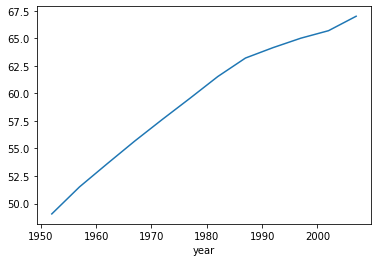

In [36]:
global_yearly_life.plot()
pass